# My name: Bryan Lihardinata
## Assignment Name: CA04 - Ensemble Model

# Program Inititialization Section
## Enter your import packages here

In [1]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data File Reading Section
### Write code to read in data from external sources here
##### The dataset is obtained from the Census Bureau and represents salaries of people along with seven demographic variables. The following is a description of our dataset:
- Number of target classes: 2 ('>50K' and '<=50K') [ Labels: 1, 0 ]
- Number of attributes (Columns): 7
- Number of instances (Rows): 48,842

In [3]:
#read datasets
df = pd.read_csv('/content/drive/MyDrive/MSBA_Colab_2020/ML_Algorithms/CA04/census_data.csv')
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.




In [4]:
#Statistical Description of data (data.describe)
df.describe()
#result nothing because the data has been discretized

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
#Statistical Description of data (data.shape)
df.shape

(48842, 11)

In [6]:
#Display number of non-null values for each column (data.count)
df.count()
#no null value

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [7]:
#double Checking null value
df[df.isnull().any(axis=1)].count()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [8]:
#Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [9]:
#Display Top 10 and Bottom 10 records (head and tail)
df.head(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
5,b. 31-40,e. High,c. High,a. = 0,b. Mid,d. 14,d. Masters,b. income,d. 36-40 & 56-60,train,0
6,a. 0-30,a. Low,b. Mid,a. = 0,a. Low,a. 0-8,a. Low,b. income,e. 40-55,train,0
7,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,1
8,d. 41-50 & 61-70,e. High,b. Mid,c. > 0,b. Mid,d. 14,d. Masters,b. income,c. 31-35 & 61-70,train,1
9,b. 31-40,e. High,c. High,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,1


In [10]:
df.tail(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
48832,d. 41-50 & 61-70,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,c. 31-35 & 61-70,test,0
48833,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,c. 31-35 & 61-70,test,0
48834,b. 31-40,a. Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,b. income,a. 0-25,test,0
48835,b. 31-40,a. Low,b. Mid,a. = 0,c. High,d. 14,d. Masters,b. income,e. 40-55,test,0
48836,b. 31-40,e. High,a. Low,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,0
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0
48841,e. 51-60,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,1


## Beautifying the dataset
- Changing the "Y" column into "Target" 
- Removing "bins" from variable names




In [11]:
#Rename the columns for a better clarification
df.rename(columns= {'hours_per_week_bin':'hours_per_week', 
                    'occupation_bin':'occupation',
                    'msr_bin': 'marital_status',
                    'capital_gl_bin':'capital_gain_loss',
                    'education_num_bin':'education_num',
                    'education_bin':'education',
                    'race_sex_bin':'race_sex',
                    'workclass_bin':'workclass',
                    'age_bin':'age',
                    'y': 'target'}, inplace= True)
df

,hours_per_week,occupation,marital_status,capital_gain_loss,race_sex,education_num,education,workclass,age,flag,target
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


# Build Decision Tree Classifier Models

## Splitting the dataframe into train and test based on "flag"

In [12]:
#Split the dataset into train
train = df[df.flag == "train"]
train

,hours_per_week,occupation,marital_status,capital_gain_loss,race_sex,education_num,education,workclass,age,flag,target
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,b. 31-40,d. Mid - High,c. High,a. = 0,b. Mid,b. 9-12,b. Mid,b. income,b. 26-30 & 71-100,train,0
32557,b. 31-40,b. Mid - Low,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,1
32558,b. 31-40,b. Mid - Low,b. Mid,a. = 0,b. Mid,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
32559,a. 0-30,b. Mid - Low,a. Low,a. = 0,c. High,b. 9-12,b. Mid,b. income,a. 0-25,train,0


In [13]:
#Split the dataset into test
#reset_index is used so that index starts at 0
#drop = false is the default -> keeping the original index as a column
test = df[df.flag == "test"].reset_index(drop=True)
test

,hours_per_week,occupation,marital_status,capital_gain_loss,race_sex,education_num,education,workclass,age,flag,target
0,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,a. 0-8,a. Low,b. income,a. 0-25,test,0
1,d. 41-50 & 61-70,b. Mid - Low,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,test,0
2,b. 31-40,d. Mid - High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,b. 26-30 & 71-100,test,1
3,b. 31-40,b. Mid - Low,c. High,c. > 0,b. Mid,b. 9-12,b. Mid,b. income,e. 40-55,test,1
4,a. 0-30,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,a. 0-25,test,0
...,...,...,...,...,...,...,...,...,...,...,...
16276,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
16277,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
16278,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
16279,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


## Building the Decision Tree

### Building The Training Data

In [14]:
#Invoking decision tree classifier
from sklearn.tree import DecisionTreeClassifier

an array X, sparse or dense, of shape (n_samples, n_features) holding the training samples, and an array Y of integer values, shape (n_samples,)

In [15]:
#concept refers to https://www.youtube.com/watch?v=PHxYNGo8NcI&t=601s
from sklearn import tree
X_train = train.drop('target', axis = 'columns')
Y_train = train['target']

In [16]:
#since values are discrete, we should change that into a label
from sklearn.preprocessing import LabelEncoder

In [17]:
#label encoding
le_hours = LabelEncoder()
le_occupation = LabelEncoder()
le_marital = LabelEncoder()
le_capital = LabelEncoder()
le_race_sex = LabelEncoder()
le_education_num = LabelEncoder()
le_education = LabelEncoder()
le_workclass = LabelEncoder()
le_age = LabelEncoder()
le_flag = LabelEncoder()

In [18]:
#adding label code for each column variable to X
X_train['hours_n'] = le_hours.fit_transform(X_train['hours_per_week'])
X_train['occupation_n'] = le_occupation.fit_transform(X_train['occupation'])
X_train['marital_n'] = le_marital.fit_transform(X_train['marital_status'])
X_train['capital_n'] = le_capital.fit_transform(X_train['capital_gain_loss'])
X_train['race_sex_n'] = le_race_sex.fit_transform(X_train['race_sex'])
X_train['education_num_n'] = le_education_num.fit_transform(X_train['education_num'])
X_train['education_n'] = le_education.fit_transform(X_train['education'])
X_train['workclass_n'] = le_workclass.fit_transform(X_train['workclass'])
X_train['age_n'] = le_age.fit_transform(X_train['age'])
X_train.head(10)

,hours_per_week,occupation,marital_status,capital_gain_loss,race_sex,education_num,education,workclass,age,flag,hours_n,occupation_n,marital_n,capital_n,race_sex_n,education_num_n,education_n,workclass_n,age_n
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,1,1,1,2,2,2,2,1,3
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0,4,2,0,2,2,2,1,4
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,1,0,1,0,2,1,1,1,3
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,1,0,2,0,1,0,0,1,4
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,1,4,2,0,0,2,2,1,1
5,b. 31-40,e. High,c. High,a. = 0,b. Mid,d. 14,d. Masters,b. income,d. 36-40 & 56-60,train,1,4,2,0,1,3,3,1,3
6,a. 0-30,a. Low,b. Mid,a. = 0,a. Low,a. 0-8,a. Low,b. income,e. 40-55,train,0,0,1,0,0,0,0,1,4
7,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,3,4,2,0,2,1,1,1,4
8,d. 41-50 & 61-70,e. High,b. Mid,c. > 0,b. Mid,d. 14,d. Masters,b. income,c. 31-35 & 61-70,train,3,4,1,2,1,3,3,1,2
9,b. 31-40,e. High,c. High,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,1,4,2,2,2,2,2,1,4


In [19]:
#eliminating all non-label columns
X_train_n = X_train.drop(X_train.iloc[:, 0:10].columns, axis= 1)
X_train_n

,hours_n,occupation_n,marital_n,capital_n,race_sex_n,education_num_n,education_n,workclass_n,age_n
0,1,1,1,2,2,2,2,1,3
1,0,4,2,0,2,2,2,1,4
2,1,0,1,0,2,1,1,1,3
3,1,0,2,0,1,0,0,1,4
4,1,4,2,0,0,2,2,1,1
...,...,...,...,...,...,...,...,...,...
32556,1,3,2,0,1,1,1,1,1
32557,1,1,2,0,2,1,1,1,3
32558,1,1,1,0,1,1,1,1,3
32559,0,1,0,0,2,1,1,1,0


### Buidling the Test Data

In [20]:
#setting up the column
X_test = test.drop('target', axis = 'columns')
Y_test = test['target']
X_test.head(10)

,hours_per_week,occupation,marital_status,capital_gain_loss,race_sex,education_num,education,workclass,age,flag
0,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,a. 0-8,a. Low,b. income,a. 0-25,test
1,d. 41-50 & 61-70,b. Mid - Low,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,test
2,b. 31-40,d. Mid - High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,b. 26-30 & 71-100,test
3,b. 31-40,b. Mid - Low,c. High,c. > 0,b. Mid,b. 9-12,b. Mid,b. income,e. 40-55,test
4,a. 0-30,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,a. 0-25,test
5,a. 0-30,a. Low,b. Mid,a. = 0,c. High,a. 0-8,a. Low,b. income,c. 31-35 & 61-70,test
6,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,b. 26-30 & 71-100,test
7,b. 31-40,e. High,c. High,c. > 0,c. High,e. 15+,e. High,b. income,c. 31-35 & 61-70,test
8,b. 31-40,a. Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,b. income,a. 0-25,test
9,a. 0-30,c. Mid - Mid,c. High,a. = 0,c. High,a. 0-8,a. Low,b. income,e. 40-55,test


In [21]:
#since values are discrete, we should change that into a label
from sklearn.preprocessing import LabelEncoder

#label encoding
le_hours = LabelEncoder()
le_occupation = LabelEncoder()
le_marital = LabelEncoder()
le_capital = LabelEncoder()
le_race_sex = LabelEncoder()
le_education_num = LabelEncoder()
le_education = LabelEncoder()
le_workclass = LabelEncoder()
le_age = LabelEncoder()
le_flag = LabelEncoder()

In [22]:
#adding label code for each column variable to X
X_test['hours_n'] = le_hours.fit_transform(X_test['hours_per_week'])
X_test['occupation_n'] = le_occupation.fit_transform(X_test['occupation'])
X_test['marital_n'] = le_marital.fit_transform(X_test['marital_status'])
X_test['capital_n'] = le_capital.fit_transform(X_test['capital_gain_loss'])
X_test['race_sex_n'] = le_race_sex.fit_transform(X_test['race_sex'])
X_test['education_num_n'] = le_education_num.fit_transform(X_test['education_num'])
X_test['education_n'] = le_education.fit_transform(X_test['education'])
X_test['workclass_n'] = le_workclass.fit_transform(X_test['workclass'])
X_test['age_n'] = le_age.fit_transform(X_test['age'])
X_test.head(10)

,hours_per_week,occupation,marital_status,capital_gain_loss,race_sex,education_num,education,workclass,age,flag,hours_n,occupation_n,marital_n,capital_n,race_sex_n,education_num_n,education_n,workclass_n,age_n
0,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,a. 0-8,a. Low,b. income,a. 0-25,test,1,1,0,0,1,0,0,1,0
1,d. 41-50 & 61-70,b. Mid - Low,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,test,3,1,2,0,2,1,1,1,3
2,b. 31-40,d. Mid - High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,b. 26-30 & 71-100,test,1,3,2,0,2,1,1,1,1
3,b. 31-40,b. Mid - Low,c. High,c. > 0,b. Mid,b. 9-12,b. Mid,b. income,e. 40-55,test,1,1,2,2,1,1,1,1,4
4,a. 0-30,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,a. 0-25,test,0,1,0,0,1,1,1,0,0
5,a. 0-30,a. Low,b. Mid,a. = 0,c. High,a. 0-8,a. Low,b. income,c. 31-35 & 61-70,test,0,0,1,0,2,0,0,1,2
6,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,b. 26-30 & 71-100,test,1,1,0,0,1,1,1,0,1
7,b. 31-40,e. High,c. High,c. > 0,c. High,e. 15+,e. High,b. income,c. 31-35 & 61-70,test,1,4,2,2,2,4,4,1,2
8,b. 31-40,a. Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,b. income,a. 0-25,test,1,0,0,0,1,1,1,1,0
9,a. 0-30,c. Mid - Mid,c. High,a. = 0,c. High,a. 0-8,a. Low,b. income,e. 40-55,test,0,2,2,0,2,0,0,1,4


In [23]:
#eliminating all non-label columns
X_test_n = X_test.drop(X_test.iloc[:, 0:10].columns, axis= 1)
X_test_n.head(10)

,hours_n,occupation_n,marital_n,capital_n,race_sex_n,education_num_n,education_n,workclass_n,age_n
0,1,1,0,0,1,0,0,1,0
1,3,1,2,0,2,1,1,1,3
2,1,3,2,0,2,1,1,1,1
3,1,1,2,2,1,1,1,1,4
4,0,1,0,0,1,1,1,0,0
5,0,0,1,0,2,0,0,1,2
6,1,1,0,0,1,1,1,0,1
7,1,4,2,2,2,4,4,1,2
8,1,0,0,0,1,1,1,1,0
9,0,2,2,0,2,0,0,1,4


# Finding Optimal Value of a key Hyper-parameter

N_estimator = max of trees you want to produce. 

## DecisionTree: Hyper-Parameter = Estimator

For Ensemble Models, one of the key hyper-parameter is number of “estimators”.
Following is an example of fining the optimal value of “Maximum Depth”. Review the
following code snippet to understand how the optimal value of this hyper-parameter
(Max Depth = 10) is found by plotting a graph.

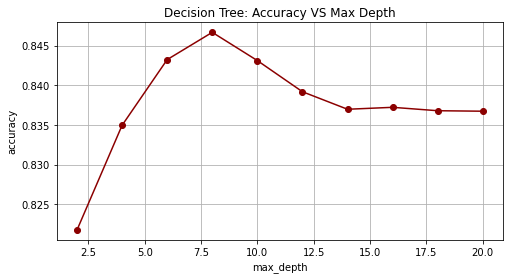

In [40]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
#for each of the values in max_depth_options, insert that value into max_depth to build the model
for value in max_depth_options:
  model = DecisionTreeClassifier(max_depth=value, random_state=101)
  model.fit(X_train_n, Y_train)
  y_pred = model.predict(X_test_n)
#below accuracy method produces the same result as
#from sklearn.metrics import accuracy_score -> accuracy = accuracy_score(Y_test, y_pred)
  accuracy = np.mean(Y_test == y_pred)
  results.append(accuracy)
#print(results) -> to show the accuracy results in a list for each depth

plt.figure(figsize=(8,4))
plt.title('Decision Tree: Accuracy VS Max Depth')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
pd.Series(results, max_depth_options).plot(color="darkred", marker = "o")
plt.grid()
plt.show()


The above plot shows a different result than the former graph made by Prof. Brahma. The graph shows that the highest accuracy score takes place at 0.8466 when the max_depth equals to 8

## Random Forest: Hyper-Parameter = N_estimator

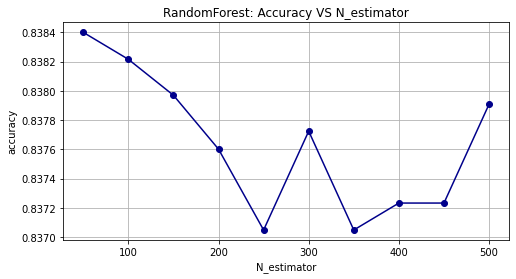

In [26]:
#print(n_values) --> [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
n_values = [x for x in range(50, 550, 50)]
results = []
#for each of the values in max_depth_options, insert that value into max_depth to build the model
for value in n_values:
  model = RandomForestClassifier(n_estimators=value, max_features="auto", random_state=101)
  model.fit(X_train_n, Y_train)
  y_pred = model.predict(X_test_n)

#below accuracy method is the same as "accuracy = np.mean(Y_test == y_pred)"
  accuracy = accuracy_score(Y_test, y_pred)
  results.append(accuracy)  
#print(results) -> to show the accuracy results in a list for each depth

plt.figure(figsize=(8,4))
plt.title('RandomForest: Accuracy VS N_estimator')
plt.xlabel('N_estimator')
plt.ylabel('accuracy')
pd.Series(results, n_values).plot(color="darkblue", marker = "o")
plt.grid()
plt.show()

The graph shows that the highest accuracy score is at 0.8384 when the N_estimator value equals to 50

## AdaBoost: HyperParameter - N_estimator

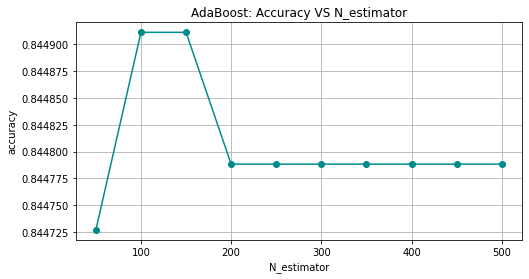

In [27]:
#for each of the values in n_values, insert that value into n_estimator to build the graph
results = []
n_values = [x for x in range(50, 550, 50)]

for value in n_values:
  model = AdaBoostClassifier(n_estimators=value, random_state = 101)
  model.fit(X_train_n, Y_train)
  y_pred = model.predict(X_test_n)
#below accuracy method produces the same result as
  accuracy = accuracy_score(Y_test, y_pred)
  results.append(accuracy)
#print(results) -> to show the accuracy results in a list for each depth
plt.figure(figsize=(8,4))
plt.title('AdaBoost: Accuracy VS N_estimator')
plt.xlabel('N_estimator')
plt.ylabel('accuracy')
pd.Series(results, n_values).plot(color="darkcyan", marker = "o")
plt.grid()
plt.show()



The graph shows that the highest accuracy score is at 0.844911 when the N_estimator values are 100-150. The graph shows that the accuracy score of the above graph remains the same when the n_estimators hit 200 or more

## GradientBoost: HyperParameter - N_estimator

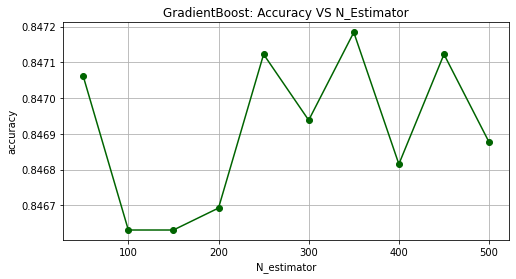

In [38]:
results = []
n_values = [x for x in range(50, 550, 50)]
#for each of the values in n_values, insert that value into n_estimator to build the graph
for value in n_values:
  model = GradientBoostingClassifier(n_estimators = value, random_state = 101)
  model.fit(X_train_n, Y_train)
  y_pred = model.predict(X_test_n)
#below accuracy method produces the same result as
  accuracy = accuracy_score(Y_test, y_pred)
  results.append(accuracy)
#print(results) -> to show the accuracy results in a list for each depth

plt.figure(figsize=(8,4))

plt.title('GradientBoost: Accuracy VS N_Estimator')
plt.xlabel('N_estimator')
plt.ylabel('accuracy')
pd.Series(results, n_values).plot(color="darkgreen", marker = "o")
plt.grid()
plt.show()

The graph shows that the highest accuracy score is at 0.8471 when the N_estimator value is 350

## XGB Model: HyperParameteer - N_Estimator

In [30]:
from sklearn import datasets
import xgboost as xgb

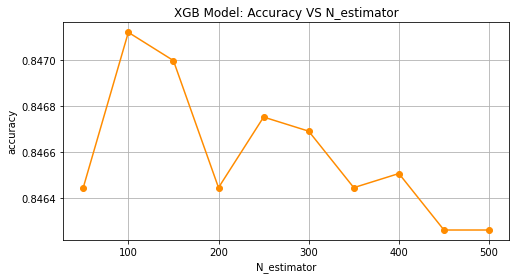

In [36]:
results = []
n_values = [x for x in range(50, 550, 50)]

for value in n_values:
#multi:softprob doesnt work
  model=xgb.XGBClassifier(random_state=101, learning_rate=0.1, n_estimators= value)
  model.fit(X_train_n, Y_train)
  y_pred = model.predict(X_test_n)
#below accuracy method produces the same result as
  accuracy = accuracy_score(Y_test, y_pred)
  results.append(accuracy)
#print(results)

plt.figure(figsize=(8,4))

plt.title('XGB Model: Accuracy VS N_estimator')
plt.xlabel('N_estimator')
plt.ylabel('accuracy')
pd.Series(results, n_values).plot(color="darkorange", marker = "o")
plt.grid()
plt.show()

The graph shows that the highest accuracy score is at 0.8471 when the N_estimator value is 100

# Compare Performance

Keep all common Hyper-parameters same for four models (Random Forest, AdaBoost,
Gradient Boost, XGB), run them again and create a performance comparison table
within your code and print the same as follow:

In [32]:
#Create a new dataframe
df = pd.DataFrame(columns = ['Random Forest', 'Ada Boost', 'Gradient Boost', 'XGB'],  
                   index = ['Accuracy', 'AUC']) 

df

,Random Forest,Ada Boost,Gradient Boost,XGB
Accuracy,NaN,NaN,NaN,NaN
AUC,NaN,NaN,NaN,NaN


In [33]:
#set N_estimator at 100
N_est = 100
def model():
  for index, row in df.iterrows():
#Filling Accuracy Row
    if index == 'Accuracy':

#Generating Random Forest Accuracy
      RF = RandomForestClassifier(n_estimators=N_est, max_features="auto", random_state=101)
      RF.fit(X_train_n, Y_train)
      RF_pred = RF.predict(X_test_n)
      accuracy = accuracy_score(Y_test, RF_pred)
      df.at[index, 'Random Forest'] = accuracy
#Generating Ada Boost Accuracy
      AB = AdaBoostClassifier(n_estimators=N_est, random_state=101)
      AB.fit(X_train_n, Y_train)
      AB_pred = AB.predict(X_test_n)
      accuracy = accuracy_score(Y_test, AB_pred)
      df.at[index, 'Ada Boost'] = accuracy
#Generating Gradient Boost Accuracy
      GB = GradientBoostingClassifier(n_estimators = N_est, random_state=101)
      GB.fit(X_train_n, Y_train)
      GB_pred = GB.predict(X_test_n)
      accuracy = accuracy_score(Y_test, GB_pred)
      df.at[index, 'Gradient Boost'] = accuracy
#Generating XGB Accuracy
      XGB = xgb.XGBClassifier(random_state=101, learning_rate=0.1, n_estimators= N_est)
      XGB.fit(X_train_n, Y_train)
      XGB_pred = XGB.predict(X_test_n)
      accuracy = accuracy_score(Y_test, XGB_pred)
      df.at[index, 'XGB'] = accuracy

#Filling AUC row
    if index == 'AUC':

#Generating RF AUC score
      AUC = roc_auc_score(Y_test, RF_pred)
      df.at[index, 'Random Forest'] = AUC
#Generating Ada Boost AUC score
      AUC = roc_auc_score(Y_test, AB_pred)
      df.at[index, 'Ada Boost'] = AUC
#Generating Gradient Boost AUC score
      AUC = roc_auc_score(Y_test, GB_pred)
      df.at[index, 'Gradient Boost'] = AUC
#Generating XGB AUC score
      AUC = roc_auc_score(Y_test, XGB_pred)
      df.at[index, 'XGB'] = AUC

model()
df.head()

,Random Forest,Ada Boost,Gradient Boost,XGB
Accuracy,0.838216,0.844911,0.846631,0.847122
AUC,0.747542,0.746088,0.756732,0.756785


The table above shows that XGB has the highest accuracy and AUC scores